In [181]:
import glob
import numpy as np
import sys
import importlib
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec


from skimage.morphology import area_opening

# Include path to my modules
MY_UTILS_PATH = "../Modules/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
    
# Import my modules
import data_generator_mc_combined
importlib.reload(data_generator_mc_combined)
from data_generator_mc_combined import DataGenerator

In [182]:
# Input parameters
H = 218
W = 170
channels = 24
batch_size = 8
nslices = 256
crop = (15, 15)

train_path = "../../MR_data/train_val_12_channel/Train/"
sampling_mask_path = "../Data/poisson_sampling/R10_218x170.npy"

### Testing the area threshold for extraction of auto calibration signal

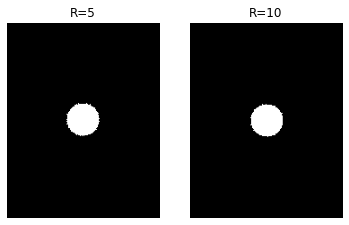

In [179]:
sp_r5 = np.load("../Data/poisson_sampling/R5_218x170.npy")
sp_r10 = np.load("../Data/poisson_sampling/R10_218x170.npy")

test = area_opening(sp_r5[0], area_threshold=10, connectivity=1, parent=None, tree_traverser=None)

test2 = area_opening(sp_r10[0], area_threshold=10, connectivity=1, parent=None, tree_traverser=None)

plt.figure()
plt.subplot(121)
plt.imshow(test,cmap ="gray")
plt.axis("off")
plt.title("R=5")
plt.subplot(122)
plt.imshow(test2,cmap ="gray")
plt.title("R=10")
plt.axis("off")
plt.show()

### Get data for a batch and output combined reference images

In [180]:
train = glob.glob(train_path + "*.h5")
var_sampling_mask = np.load(sampling_mask_path)

asc = area_opening(var_sampling_mask[0], area_threshold=10, connectivity=1, parent=None, tree_traverser=None)

var_sampling_mask = np.repeat(var_sampling_mask[:, :, :, np.newaxis], 24, axis = -1) 

train_generator = DataGenerator(train, dim = (H, W), under_masks = var_sampling_mask,  crop = crop,\
                            batch_size = batch_size, n_channels = channels, nslices = nslices, shuffle=False, asc = asc)


sample = train_generator[10]

# plt.figure(figsize = (8,6),dpi = 150)
# gs1 = gridspec.GridSpec(2, 4)
# gs1.update(wspace=0.05, hspace=0.1)

sample_img = sample[1][1]


sample_img = sample_img[:,:,::2] + 1j*sample_img[:,:,1::2]

plt.imshow(np.sqrt(np.abs(sample_img)),cmap = "gray")
plt.axis("off")
plt.show()


TypeError: safe_divide() missing 1 required positional argument: 'b'

### Visualize combined undersampled images

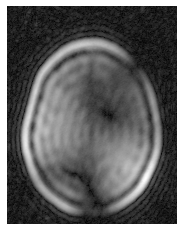

In [175]:
# plt.figure(figsize = (8,6),dpi = 150)
# gs1 = gridspec.GridSpec(2, 4)
# gs1.update(wspace=0.05, hspace=0.1)

sample_img = sample[0][0][1]
sample_img = sample_img[:,:,::2] + 1j*sample_img[:,:,1::2]
sample_img = np.fft.ifft2(sample_img,axes = (0,1))


plt.imshow(np.sqrt(np.abs(sample_img)),cmap = "gray")
plt.axis("off")
plt.show()

### Visualize sensitivity maps for above images

(218, 170, 12)


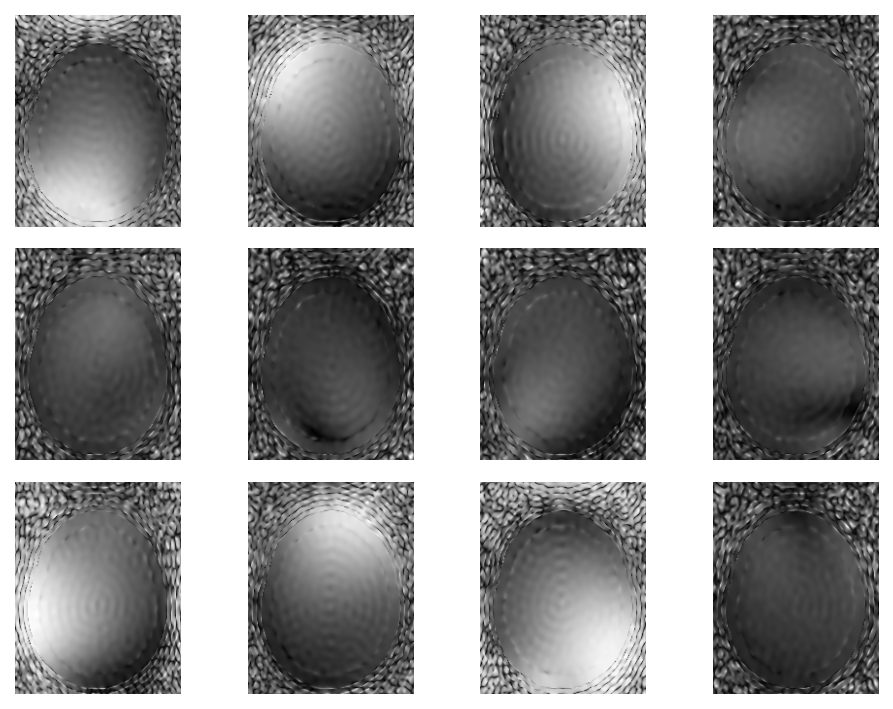

In [176]:
plt.figure(figsize = (8,6),dpi = 150)
gs1 = gridspec.GridSpec(3, 4)
gs1.update(wspace=0.002, hspace=0.1)

sample_img = sample[0][3][1]
print(sample_img.shape)
for ii in range(12):
    plt.subplot(gs1[ii])
    plt.imshow(np.log(1+np.abs(sample_img[:,:,ii])),cmap = "gray")
    plt.axis("off")
plt.show()
